# GARCH Прогноз волатильности

## Читаем данные

In [22]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## Волатильность

In [23]:
dis = pd.read_csv('moex.csv')['<CLOSE>']

In [24]:
returns = dis.pct_change().dropna()

Text(0.5, 1.0, 'MOEX Доходности')

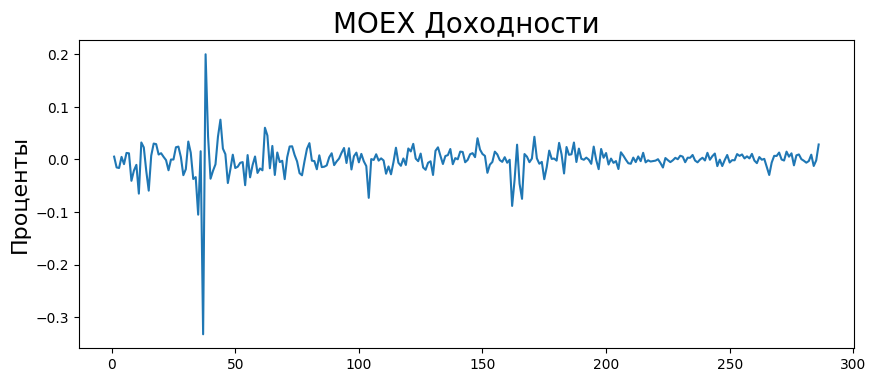

In [39]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Проценты', fontsize=16)
plt.title('MOEX Доходности', fontsize=20)

## PACF

C:\Users\KudVl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


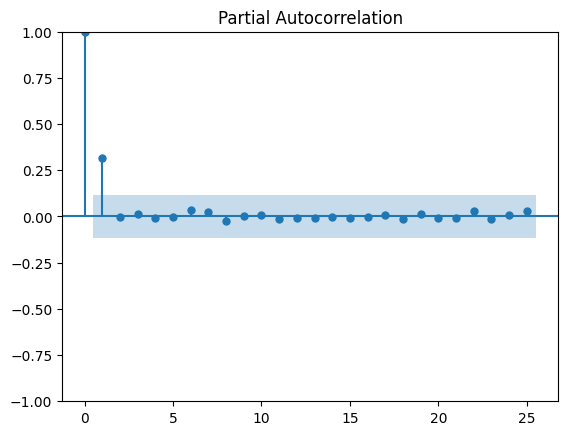

In [26]:
plot_pacf(returns**2)
plt.show()

## Обучаем модель GARCH(1,1)

In [27]:
model = arch_model(returns, p=1, q=1)

In [28]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 286681030139.4887
Iteration:      2,   Func. Count:     19,   Neg. LLF: 12307253.734894441
Iteration:      3,   Func. Count:     31,   Neg. LLF: 275.6857353330812
Iteration:      4,   Func. Count:     42,   Neg. LLF: 33183.112273466526
Iteration:      5,   Func. Count:     53,   Neg. LLF: -499.32045639222935
Iteration:      6,   Func. Count:     59,   Neg. LLF: -698.2019789981917
Iteration:      7,   Func. Count:     65,   Neg. LLF: -698.9240946405343
Iteration:      8,   Func. Count:     70,   Neg. LLF: -528.8948395736036
Iteration:      9,   Func. Count:     77,   Neg. LLF: -698.9563450606937
Iteration:     10,   Func. Count:     82,   Neg. LLF: -698.9582223119977
Iteration:     11,   Func. Count:     87,   Neg. LLF: -698.9583526437077
Iteration:     12,   Func. Count:     91,   Neg. LLF: -698.9583526438728
Optimization terminated successfully    (Exit mode 0)
            Current function value: -698.9583526437077
            Iter

C:\Users\KudVl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009462. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                <CLOSE>   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                698.958
Distribution:                  Normal   AIC:                          -1389.92
Method:            Maximum Likelihood   BIC:                          -1375.29
                                        No. Observations:                  286
Date:                Thu, Mar 30 2023   Df Residuals:                      285
Time:                        18:49:02   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.0507e-03  1.160e-03      0.906      0.365 [-1.223e-03,3.325e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.7904e-05  2.703e-05      1.772  7.638e-02 [-5.079e-06,1.009e-04]
alpha[1]       0.3421      0.205      1.673  9.433e-02   [-5.869e-02,  0.743]
beta[1]        0.6562      0.106      6.166  7.025e-10      [  0.448,  0.865]
=============================================================================

Covariance estimator: robust
"""

## Попробуем упростить модель GARCH(1,0) = ARCH(1)

In [30]:
model = arch_model(returns, p=1, q=0)

In [31]:
model_fit = model.fit()

C:\Users\KudVl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009462. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: 676669548.1401068
Iteration:      2,   Func. Count:     15,   Neg. LLF: 27932448.7234662
Iteration:      3,   Func. Count:     25,   Neg. LLF: 604.9574114985162
Iteration:      4,   Func. Count:     34,   Neg. LLF: 288.3516632463196
Iteration:      5,   Func. Count:     41,   Neg. LLF: 54835.784691760164
Iteration:      6,   Func. Count:     48,   Neg. LLF: -220.0180774619143
Iteration:      7,   Func. Count:     55,   Neg. LLF: 139935.19600693736
Iteration:      8,   Func. Count:     60,   Neg. LLF: -621.6982534514544
Iteration:      9,   Func. Count:     64,   Neg. LLF: -623.0931016205182
Iteration:     10,   Func. Count:     69,   Neg. LLF: -625.4767738350489
Iteration:     11,   Func. Count:     73,   Neg. LLF: -625.47726511535
Iteration:     12,   Func. Count:     77,   Neg. LLF: -625.4772637423926
Iteration:     13,   Func. Count:     82,   Neg. LLF: -625.477269924359
Optimization terminated successfully    (Exit mode 0)
     

In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                <CLOSE>   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                625.477
Distribution:                  Normal   AIC:                          -1244.95
Method:            Maximum Likelihood   BIC:                          -1233.99
                                        No. Observations:                  286
Date:                Thu, Mar 30 2023   Df Residuals:                      285
Time:                        18:49:02   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -5.1043e-03  3.552e-03     -1.437      0.151 [-1.207e-02,1.858e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.1296e-04  1.652e-04      2.500  1.243e-02 [8.918e-05,7.367e-04]
alpha[1]       1.0000      1.232      0.812      0.417     [ -1.414,  3.414]
============================================================================

Covariance estimator: robust
"""

In [33]:
rolling_predictions = []
test_size = 200

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\KudVl\AppData\Local\Temp\ipykernel_10724\3940218024.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train = returns[:-(test_size-i)]
C:\Users\KudVl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002517. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\KudVl\AppData\Local\Packages\Py

In [34]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-200:])

C:\Users\KudVl\AppData\Local\Temp\ipykernel_10724\614410629.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  true, = plt.plot(returns[-200:])


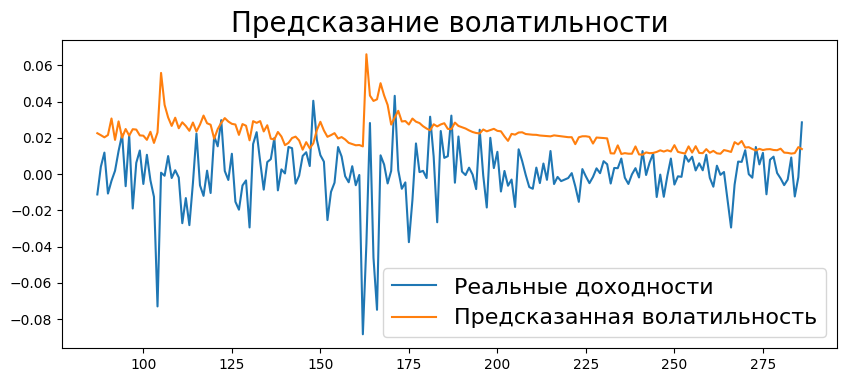

In [35]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-200:])
preds, = plt.plot(rolling_predictions)
plt.title('Предсказание волатильности', fontsize=20)
plt.legend(['Реальные доходности', 'Предсказанная волатильность'], fontsize=16)
# поменять график

# Как использовать модель

In [36]:
train = returns
model = arch_model(train, p=1, q=1)
model_fit = model.fit(disp='off')

C:\Users\KudVl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0009462. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [37]:
pred = model_fit.forecast(horizon=7)
future_dates = [ timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

C:\Users\KudVl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Text(0.5, 1.0, 'Предсказываем волатильность на 7 дней вперед')

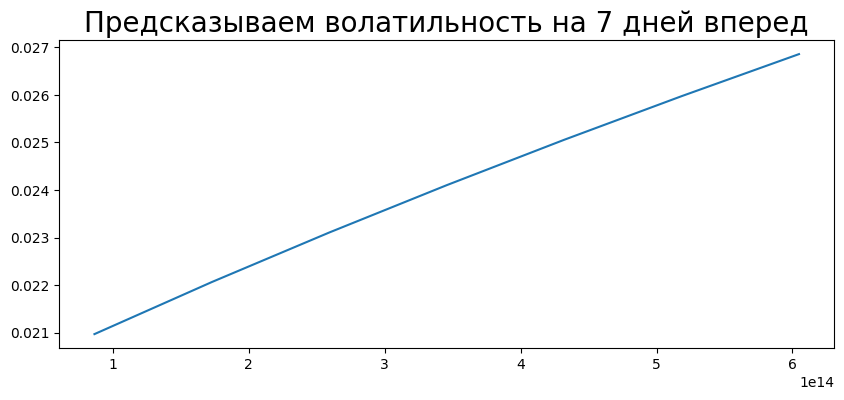

In [38]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Предсказываем волатильность на 7 дней вперед', fontsize=20)